# US REGIONAL SALES EDA

This project aims to analyze the **US Regional Sales Data.**  

In this project I have used a dataset from Kaggle:
> - [Kaggle dataset](https://www.kaggle.com/datasets/talhabu/us-regional-sales-data)


### Questions : 
 1. Time Series Analysis : How do sales trends change over time?
 2. Sales Channel Comparison : How do different sales channels perform in terms of sales?
 3. Product Analysis : How are sales distributed among different products?
 4. Discount Analysis : What is the impact of discounts on sales?

## Notebook Content

1. **Step 1 :** Install + Import Necessary Libraries.
2. **Step 2 :** Reading + Exploring Data.
3. **Step 3 :** Data Cleaning + Preprocessing.
4. **Step 4 :** Data Analysis + Visualization.
5. **Sales Data Analysis Final Results.**

## Step 1: Install + Import Necessary Libraries

In [142]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

## Step 2: Reading + Exploring Data

In [25]:
df = pd.read_csv('C:\\Users\\imane\\Desktop\\eda\\US_Regional_Sales_Data.csv')
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [26]:
df.shape

(7991, 16)

### COLUMNS DESCRIPTION : 
OrderNumber: A unique identifier for each order.

Sales Channel : The channel through which the sale was made (e.g., In-Store, Online).

WarehouseCode : Code representing the warehouse involved in the order.

ProcuredDate : Date when the products were procured.

OrderDate : Date when the order was placed.

ShipDate : Date when the order was shipped.

DeliveryDate : Date when the order was delivered.

CurrencyCode : Currency in which the transactions are conducted (e.g., USD).

_SalesTeamID : Identifier for the sales team involved.

_CustomerID : Identifier for the customer.

_StoreID : Identifier for the store.

_ProductID : Identifier for the product.

Order Quantity : Quantity of products ordered.

Discount Applied : Applied discount for the order.

Unit Cost : Cost of a single unit of the product.

Unit Price : Price at which the product was sold


In [27]:
df.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

## Step 3: Cleaning + Preprocessing 

In [29]:
# split 'OrderDate' into year, month and day.
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderDate_Year'] = df['OrderDate'].dt.year
df['OrderDate_Month'] = df['OrderDate'].dt.month
df['OrderDate_Day'] = df['OrderDate'].dt.day
df.head()

C:\Users\imane\AppData\Local\Temp\ipykernel_28440\497770927.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10",2018,5,31
1,SO - 000102,Online,WARE-NMK1003,31/12/17,2018-05-31,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60",2018,5,31
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,2018-05-31,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50",2018,5,31
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,2018-05-31,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90",2018,5,31
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,2018-05-31,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40",2018,5,31


In [31]:
# relocate columns 
df = df[['OrderNumber','Sales Channel','WarehouseCode','ProcuredDate','OrderDate','OrderDate_Day','OrderDate_Month','OrderDate_Year','ShipDate','DeliveryDate','CurrencyCode','_SalesTeamID','_CustomerID','_StoreID','_ProductID','Order Quantity','Discount Applied','Unit Cost','Unit Price']]
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,OrderDate_Day,OrderDate_Month,OrderDate_Year,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,31,5,2018,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,2018-05-31,31,5,2018,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,2018-05-31,31,5,2018,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,2018-05-31,31,5,2018,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,2018-05-31,31,5,2018,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,2020-12-30,30,12,2020,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,2020-12-30,30,12,2020,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,2020-12-30,30,12,2020,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,2020-12-30,30,12,2020,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


### Step 3.1 : Converting datatypes to required format

In [32]:
# converting 'Unit Cost' and 'Unit Price' to float.
# remove the commas 
# convert to float
 
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '').astype(float)
df['Unit Price'] = df['Unit Price'].str.replace(',', '').astype(float)
df[['Unit Cost', 'Unit Price']].dtypes

Unit Cost     float64
Unit Price    float64
dtype: object

### Step 3.2 : Selecting useful columns

In [39]:
# Selecting useful columns : 
df2 = df[['Sales Channel','OrderDate','OrderDate_Day','OrderDate_Month','OrderDate_Year','_ProductID','Order Quantity','Discount Applied','Unit Cost','Unit Price']]
df2.head()

,Sales Channel,OrderDate,OrderDate_Day,OrderDate_Month,OrderDate_Year,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,2018-05-31,31,5,2018,12,5,0.075,1001.18,1963.1
1,Online,2018-05-31,31,5,2018,27,3,0.075,3348.66,3939.6
2,Distributor,2018-05-31,31,5,2018,16,1,0.050,781.22,1775.5
3,Wholesale,2018-05-31,31,5,2018,23,8,0.075,1464.69,2324.9
4,Distributor,2018-05-31,31,5,2018,26,8,0.100,1476.14,1822.4


In [49]:
df2['Sales Channel'].unique()


array(['In-Store', 'Online', 'Distributor', 'Wholesale'], dtype=object)

### Step 3.3 : Checking for null values

In [50]:
df2.isnull().sum()

Sales Channel       0
OrderDate           0
OrderDate_Day       0
OrderDate_Month     0
OrderDate_Year      0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

## Step 4: Data Analysis + Visualization

## Sales trends over time to identify seasonal patterns and changes in demand : 

C:\Users\imane\AppData\Local\Temp\ipykernel_28440\4057360432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sales'] = df2['Unit Price'] * df2['Order Quantity']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


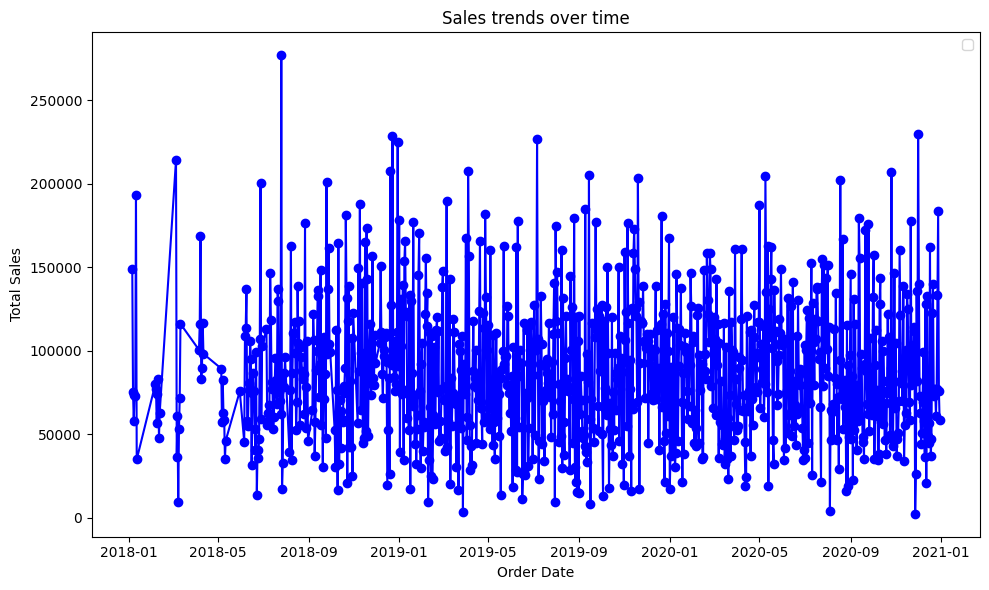

In [59]:
df2['total_sales'] = df2['Unit Price'] * df2['Order Quantity']

sales = df2.groupby('OrderDate')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.plot(sales.index,sales.values,marker='o',linestyle='-',color='b')
plt.title('Sales trends over time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


### We can clearly see **fluctuations** in sales over various time periods, which could point towards underlying seasonal patterns.

In [89]:
grouped_sales = df2.groupby(['Sales Channel','OrderDate_Month'])['total_sales'].sum().reset_index()
grouped_sales.head()

,Sales Channel,OrderDate_Month,total_sales
0,Distributor,1,1092126.8
1,Distributor,2,1108876.8
2,Distributor,3,1131717.1
3,Distributor,4,888587.5
4,Distributor,5,1281308.0


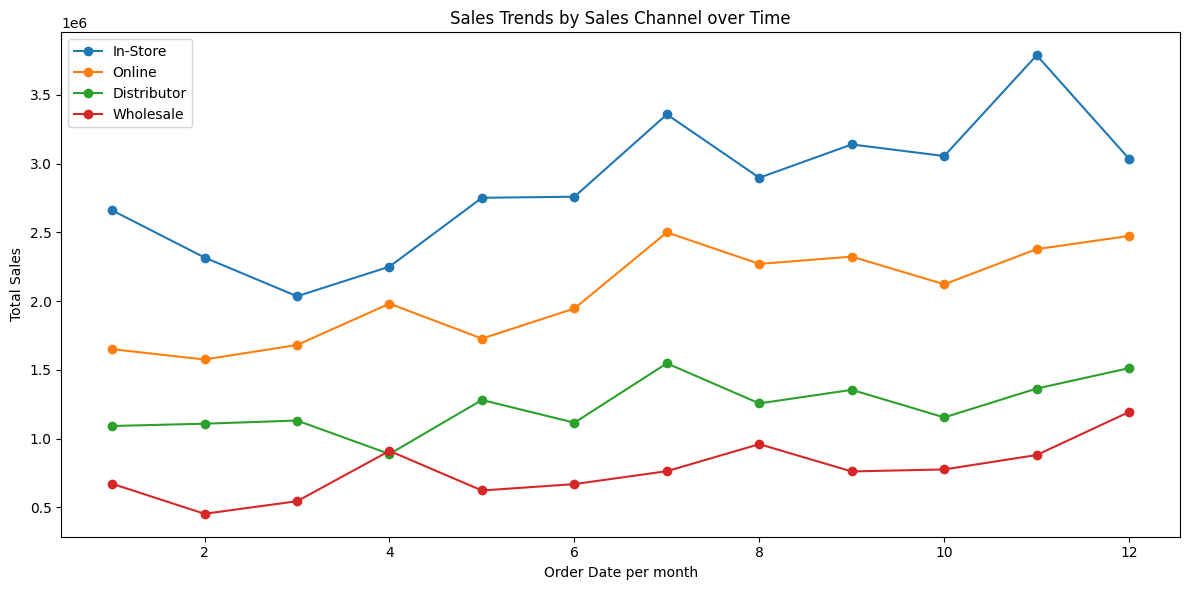

In [103]:

plt.figure(figsize=(12,6))

for channel in df2['Sales Channel'].unique():
    channel_data = grouped_sales[grouped_sales['Sales Channel'] == channel]
    plt.plot(channel_data['OrderDate_Month'], channel_data['total_sales'], marker='o', label= channel)
    
    
plt.xlabel('Order Date per month')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Sales Channel over Time')
plt.legend()
plt.tight_layout()
plt.show()

### It's evident that the 'In-Store' sales channel consistently maintains the highest sales across all periods. In second place, the online channel demonstrates a gradual upward trend over time but it is still ranked second in the total number of sales. Meanwhile, distributor and wholesale channels on the other hand are the least contributors to the sales.

In [104]:
grouped_sales_year = df2.groupby(['Sales Channel','OrderDate_Year'])['total_sales'].sum().reset_index()
grouped_sales_year.head()

,Sales Channel,OrderDate_Year,total_sales
0,Distributor,2018,3595126.2
1,Distributor,2019,5175870.6
2,Distributor,2020,6038911.0
3,In-Store,2018,8138697.7
4,In-Store,2019,13131571.2


In [106]:
sales_channel = df2['Sales Channel'].unique()
sales_channel

array(['In-Store', 'Online', 'Distributor', 'Wholesale'], dtype=object)

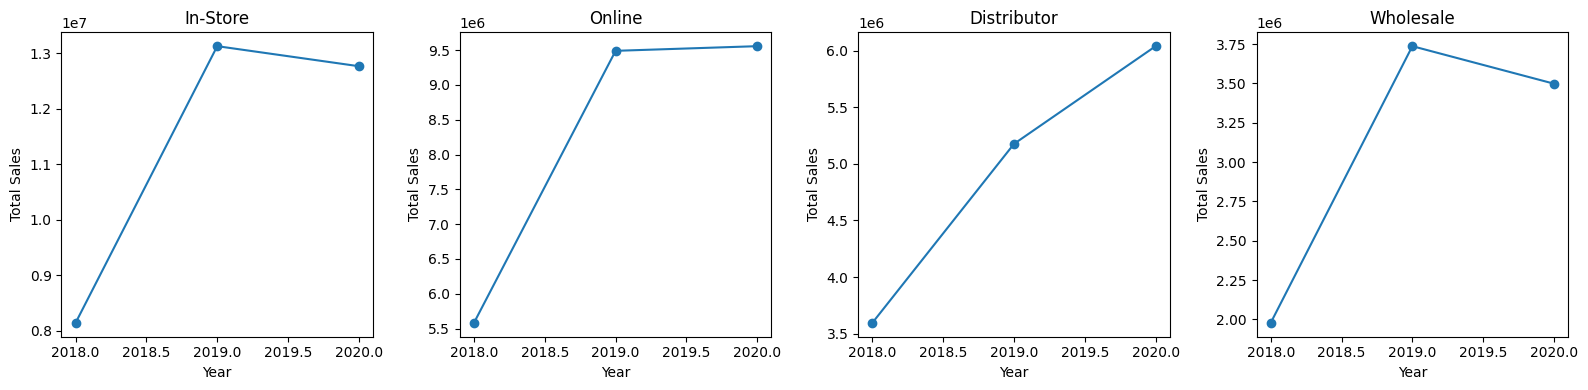

In [108]:
plt.figure(figsize= (16, 4))
for i, item in enumerate(sales_channel, start=1):
    plt.subplot(1, 4, i)
    channel_data = grouped_sales_year[grouped_sales_year['Sales Channel'] == item]
    
    plt.plot(channel_data['OrderDate_Year'], channel_data['total_sales'], marker='o')
    
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.title(item)
    
plt.tight_layout()
plt.show()

### We observe a general **upward trend** in sales over the years, with the exception of the wholesale and in-store channels. For these two channels, there's a **slight decline** that spans from the beginning of 2019 until the end of the time period.

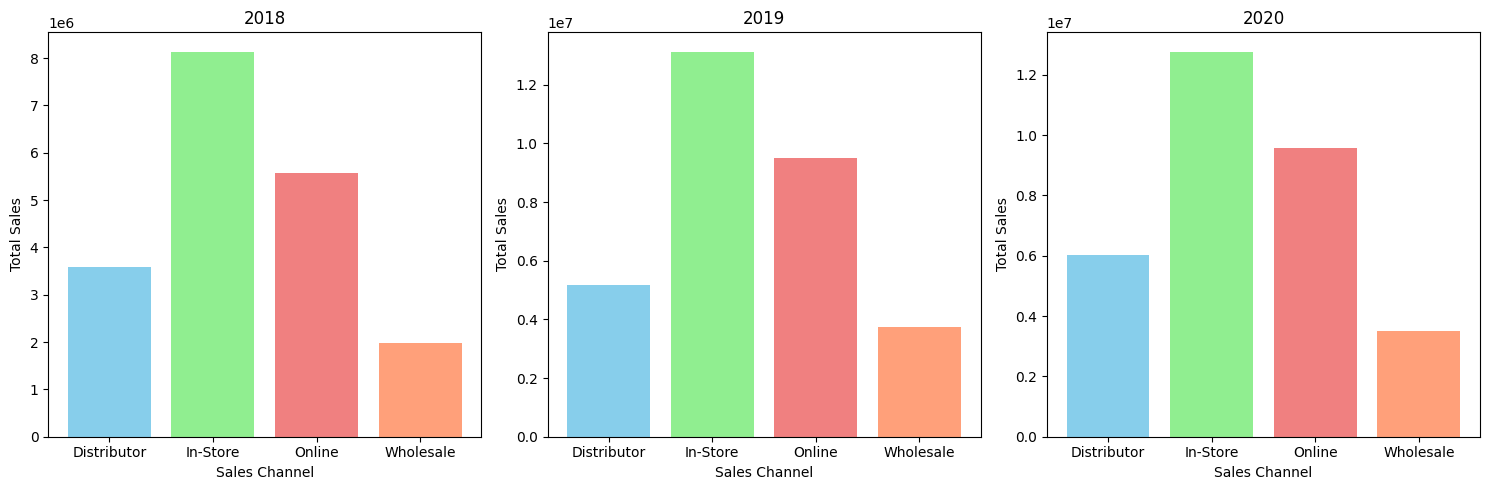

In [119]:
years = df2['OrderDate_Year'].unique()
num_years = len(years)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize= (5 * num_years, 5))
for i, item in enumerate(years, start=1):
    plt.subplot(1,num_years, i)
    years_data = grouped_sales_year[grouped_sales_year['OrderDate_Year'] == item]
    plt.bar(years_data['Sales Channel'], years_data['total_sales'], color = colors)
    plt.xlabel('Sales Channel')
    plt.ylabel('Total Sales')
    plt.title(item)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


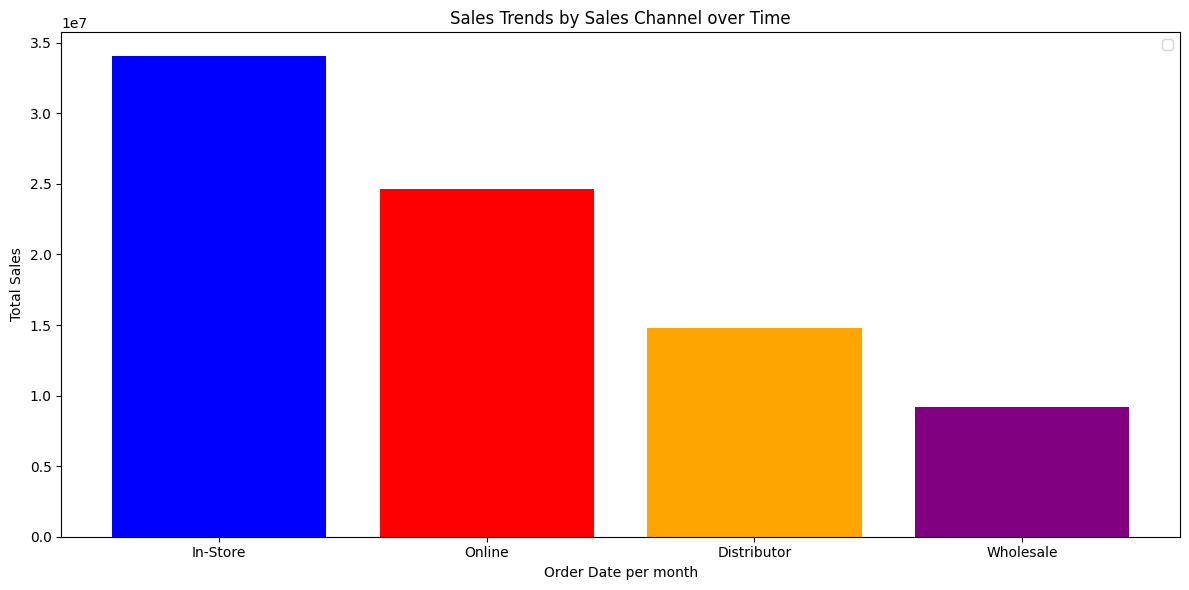

In [126]:
grouped_sales_channel = df2.groupby('Sales Channel')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(12,6))


plt.bar(grouped_sales_channel['Sales Channel'], grouped_sales_channel['total_sales'], color = ['blue','red','orange','purple'])
    
    
plt.xlabel('Order Date per month')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Sales Channel over Time')
plt.legend()
plt.tight_layout()
plt.show()

### We can see that the In-Store sales channel has **the highest sales**, followed by Online, Distributor and "Wholesale".

## The distribution of sales across different products : 

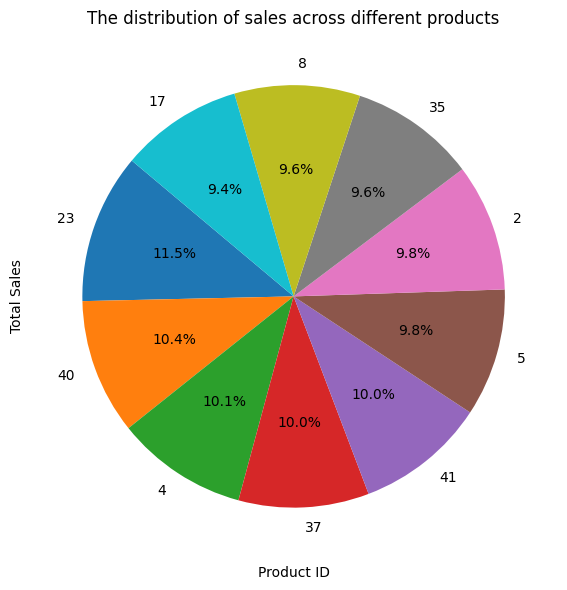

In [132]:
grouped_sales_products = df2.groupby('_ProductID')['total_sales'].sum().reset_index()

top_products = grouped_sales_products.sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.pie(top_products['total_sales'],labels= top_products['_ProductID'],autopct='%1.1f%%',startangle=140)
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('The distribution of sales across different products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The analysis of the top 10 products sales distribution reveals a remarkably **balanced distribution* of sales percentages. The top-performing products show **minimal variation** in their contribution to overall sales. Product ID 23 stands out with the highest sales percentage at 11.5%, closely followed by Product ID 40 at 10.4%

## The impact of discounts on sales :

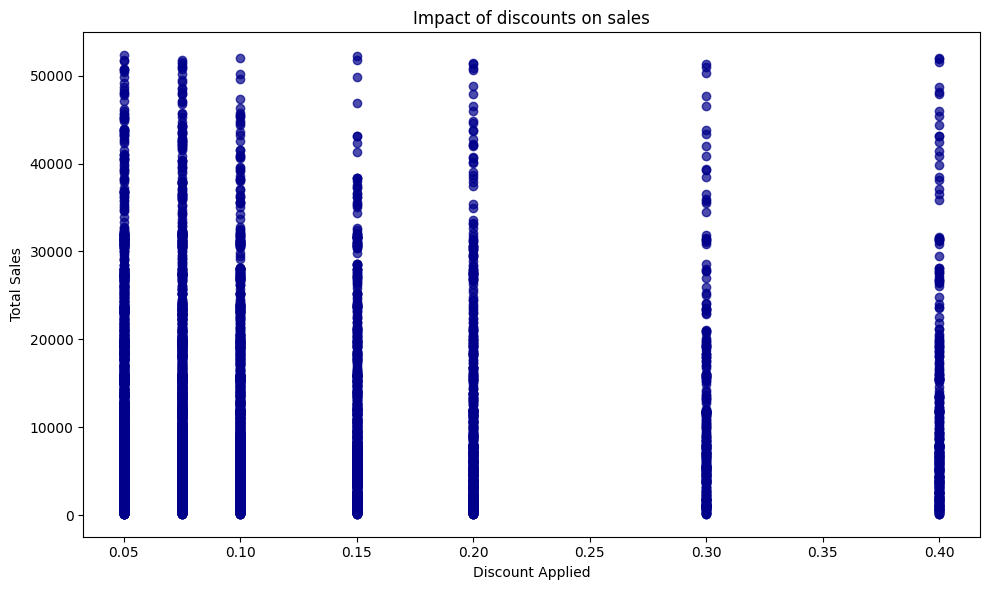

In [140]:
plt.figure(figsize=(10,6))
plt.scatter(df2['Discount Applied'], df2['total_sales'], color = 'darkblue', alpha=0.7)
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Impact of discounts on sales')
plt.tight_layout()
plt.show()

### We don't notice a direct link between discount levels and sales. Yet, we do see **clusters** of sales at specific discount levels, suggesting that **some discounts are more commonly used.**

## Us Regional Data Analysis Final Results :
1. There are fluctuations in sales over various time periods, which could point towards underlying seasonal patterns.
2. The 'Distributor' and 'Wholesale' are the least contributors to the total sales per month.
3. There is a general upward trend in sales over the years, with the exception of the wholesale and in-store channels where there's a slight decline by the end of the time period.
4.  The 'In-Store' sales channel has the highest sales, followed by Online, Distributor and Wholesale.
5. The top 10 products id that highly contributed to the overall sales are : 23, 40, 4, 37, 41, 5, 2, 35, 8, 17, 23, 40.
6. Some discounts are more commonly used, like the 0.075 discount.